# Mental Health Care Usage for Adolescents

Author: Harold Cha \
DIGHUM101 Practicing the Digital Humanities, taught by Professor Evan Muzzall

![therapy](../images/therapy.jpg)

## Introduction

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
pwd

'/Users/haroldcha/Desktop/DIGHUM101_Project/Notebooks'

In [3]:
cd "../Data/sample_child_survey/csv"

/Users/haroldcha/Desktop/DIGHUM101_Project/Data/sample_child_survey/csv


In [4]:
ls

samchild_2000.csv  samchild_2005.csv  samchild_2010.csv  samchild_2015.csv*
samchild_2001.csv  samchild_2006.csv  samchild_2011.csv  samchild_2016.csv*
samchild_2002.csv  samchild_2007.csv  samchild_2012.csv  samchild_2017.csv*
samchild_2003.csv  samchild_2008.csv  samchild_2013.csv  samchild_2018.csv*
samchild_2004.csv  samchild_2009.csv  samchild_2014.csv


In [5]:
data_name = "samchild_{}.csv" # general format for reading data files
years = range(2000,2019)

samchild = {} # dictionary with year number as key and respective dataframe from specified year as value

# These lists will be for a separate summary dataframe listing total responses per year, as well as 
# total responses per answer pertaining to "CHCSYR1" per year
sum_of_responses = []
sum_of_yes = []
sum_of_no = []

for i in years:
    samchild["{}".format(i)] = pd.read_csv(data_name.format(i))
    
    # adding values to list for summary dataframe
    sum_of_responses.append(samchild["{}".format(i)]["RECTYPE"].count())
    sum_of_yes.append(len(samchild["{}".format(i)][samchild["{}".format(i)]["CHCSYR1"]==1]))
    sum_of_no.append(len(samchild["{}".format(i)][samchild["{}".format(i)]["CHCSYR1"]==2]))
    
    
    # replacing "No" responses to zeroes
    samchild["{}".format(i)].replace({"CHCSYR1" : {2:0}}, inplace=True)
    samchild["{}".format(i)].replace({"CHCAFYR2" : {2:0}}, inplace=True)
    
    # dropping empty responses in CHCSYR1
    samchild["{}".format(i)].dropna(subset=["CHCSYR1"], inplace=True)
    
    # dropping "Refused", "Not ascertained", or "Don't Know" responses in CHCSYR1
    irrel = samchild["{}".format(i)][(samchild["{}".format(i)]['CHCSYR1'] != 0 )
                                     & (samchild["{}".format(i)]['CHCSYR1'] != 1 )].index
    samchild["{}".format(i)].drop(irrel, inplace=True)
        
    # replacing integers with string for SEX accordingly
    samchild["{}".format(i)].replace({"SEX" : {1:"male", 2:"female"}}, inplace=True) 

In [6]:
# Assigning each key-value pair from the 'samchild' dictionary to variables for conveniency

child_00 = samchild["2000"]
child_01 = samchild["2001"]
child_02 = samchild["2002"]
child_03 = samchild["2003"]
child_04 = samchild["2004"]
child_05 = samchild["2005"]
child_06 = samchild["2006"]
child_07 = samchild["2007"]
child_08 = samchild["2008"]
child_09 = samchild["2009"]
child_10 = samchild["2010"]
child_11 = samchild["2011"]
child_12 = samchild["2012"]
child_13 = samchild["2013"]
child_14 = samchild["2014"]
child_15 = samchild["2015"]
child_16 = samchild["2016"]
child_17 = samchild["2017"]
child_18 = samchild["2018"]

In [7]:
# Combining all dataframes to one

big_child = pd.concat([child_00, child_01, child_02, child_03, child_04, child_05, child_06, child_07,
                      child_08, child_09, child_10, child_11, child_12, child_13, child_14, child_15,
                      child_16, child_17, child_18], axis=0, ignore_index=True)

big_child

,RECTYPE,SRVY_YR,HHX,FMX,PX,CSRESPNO,CSRELTIV,INTV_QRT,SEX,AGE_P,...,CYTQ_MDY,CYTQU_TA,CYTQ_BTT,CYTQ_MDT,CYTQU_QG,CYTQ_BTQ,CYTQ_MDQ,SCHDAYRP,CWZMSWKP,CAROUTP
0,40,2000,1,1,5.0,2,1.0,1.0,male,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2000,2,1,3.0,1,1.0,1.0,male,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,2000,8,1,3.0,1,1.0,1.0,female,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,2000,12,1,4.0,2,1.0,1.0,female,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40,2000,14,1,6.0,2,1.0,1.0,male,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193380,40,2018,55517,1,NaN,1,NaN,4.0,female,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193381,40,2018,55526,1,NaN,2,NaN,4.0,male,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193382,40,2018,55530,1,NaN,1,NaN,4.0,male,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0
193383,40,2018,55538,1,NaN,1,NaN,4.0,female,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [8]:
# This cell creates a summary of all the counts per year

data = {"total":sum_of_responses, "CHCSYR1_yes":sum_of_yes, "CHCSYR1_no":sum_of_no}

child_summary = pd.DataFrame(data, index=years).reset_index().rename(columns={"index": "SRVY_YR"})

child_summary

,SRVY_YR,total,CHCSYR1_yes,CHCSYR1_no
0,2000,13376,729,10941
1,2001,13579,706,11214
2,2002,12524,742,10186
3,2003,12249,613,10155
4,2004,12424,743,10150
5,2005,12523,684,10322
6,2006,9837,510,8059
7,2007,9417,534,7648
8,2008,8815,509,7279
9,2009,11156,674,9105


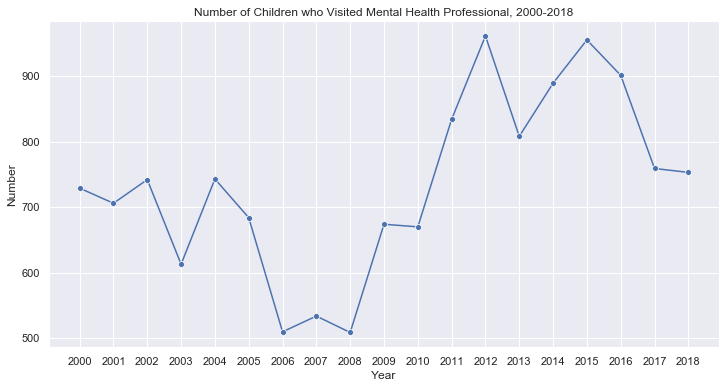

In [9]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1_yes", marker = "o", data=child_summary)
plt.title("Number of Children who Visited Mental Health Professional, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Number");

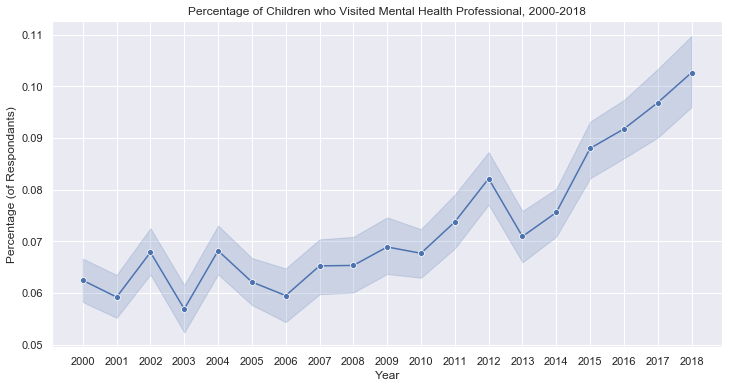

In [10]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", marker = "o", data=big_child)
plt.title("Percentage of Children who Visited Mental Health Professional, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");

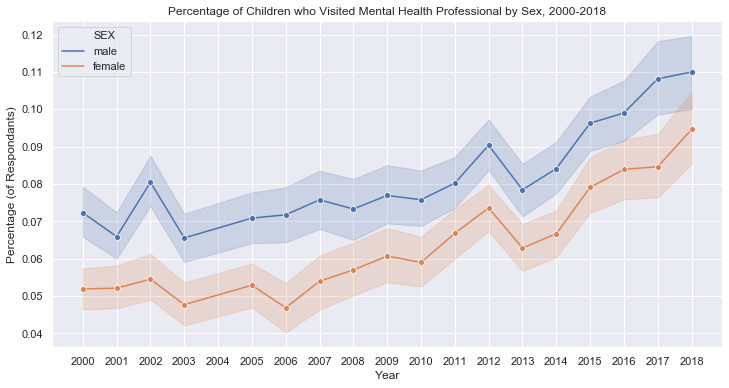

In [11]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="SEX", marker="o", data=big_child)
plt.title("Percentage of Children who Visited Mental Health Professional by Sex, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");

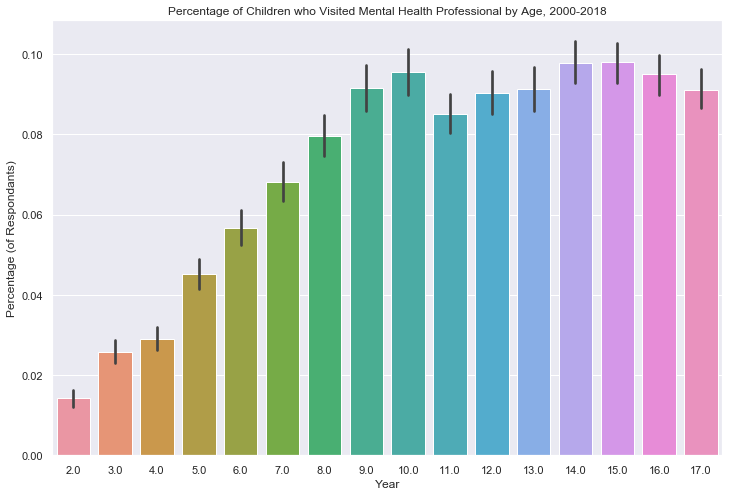

In [64]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.barplot(x="AGE_P", y="CHCSYR1", data=big_child)
plt.title("Percentage of Children who Visited Mental Health Professional by Age, 2000-2018")
plt.xlabel("Year")
plt.ylabel("Percentage (of Respondants)");

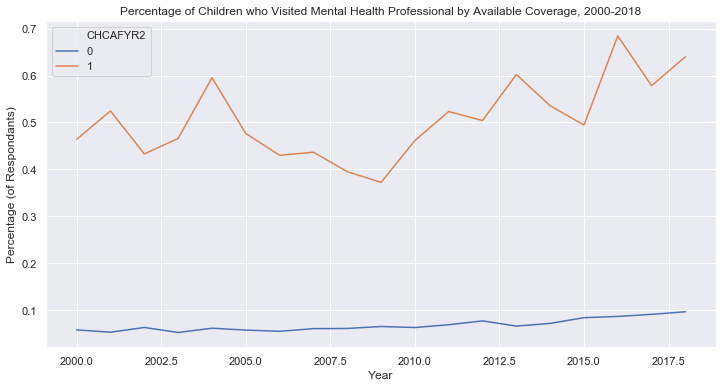

In [49]:
dont_know_afford_mental = big_child[(big_child["CHCAFYR2"] != 0) & (big_child["CHCAFYR2"] != 1)].index
big_child_afford_mental = big_child.drop(dont_know_afford_mental)

plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="CHCAFYR2", hue_order = [0,1], data=big_child_afford_mental, ci=None)
plt.title("Percentage of Children who Visited Mental Health Professional by Available Coverage, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");

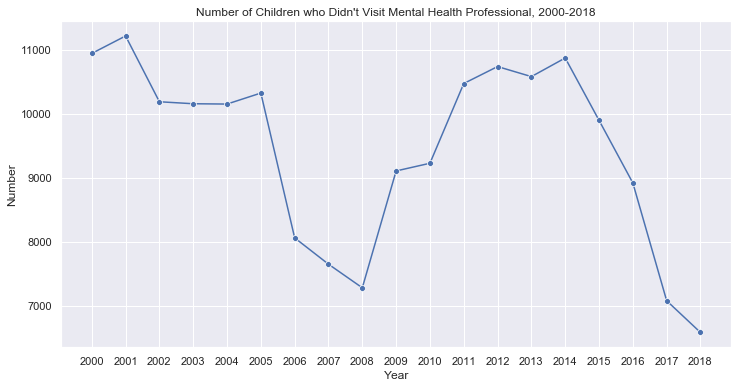

In [51]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1_no", marker = "o", data=child_summary)
plt.title("Number of Children who Didn't Visit Mental Health Professional, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Number");

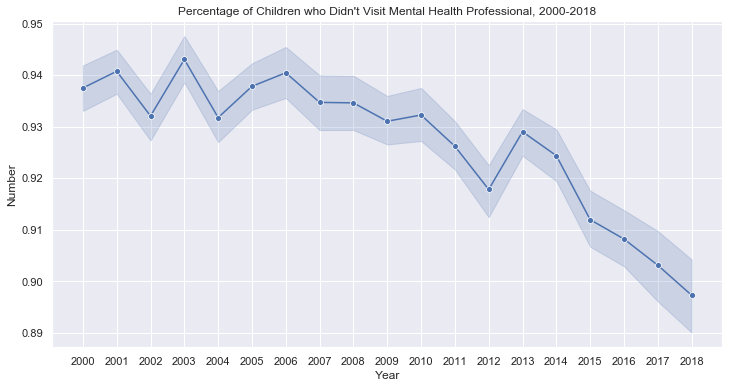

In [60]:
big_child_no_visit = big_child.replace({"CHCSYR1": {1:0, 0:1}})

plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", marker = "o", data=big_child_no_visit)
plt.title("Percentage of Children who Didn't Visit Mental Health Professional, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Number");

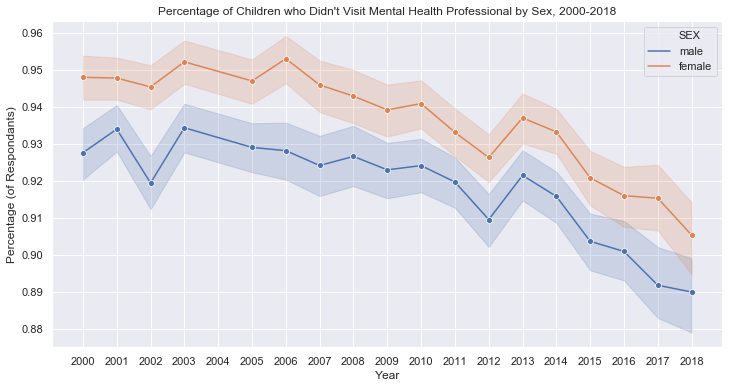

In [61]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="SEX", marker="o", data=big_child_no_visit)
plt.title("Percentage of Children who Didn't Visit Mental Health Professional by Sex, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");

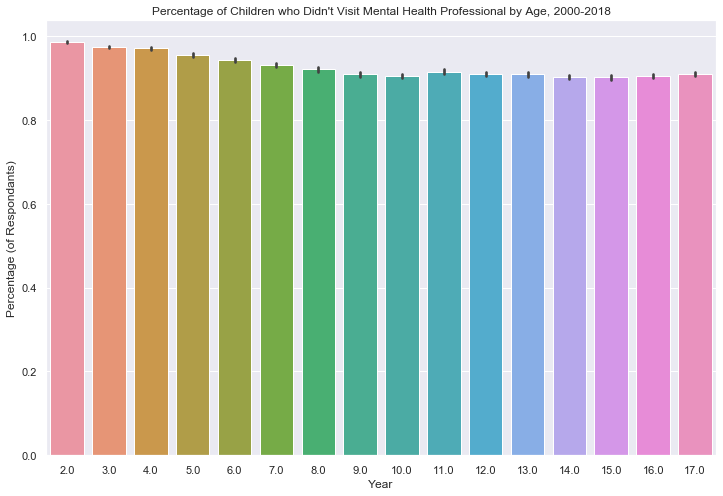

In [67]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.barplot(x="AGE_P", y="CHCSYR1", data=big_child_no_visit)
plt.title("Percentage of Children who Didn't Visit Mental Health Professional by Age, 2000-2018")
plt.xlabel("Year")
plt.ylabel("Percentage (of Respondants)");

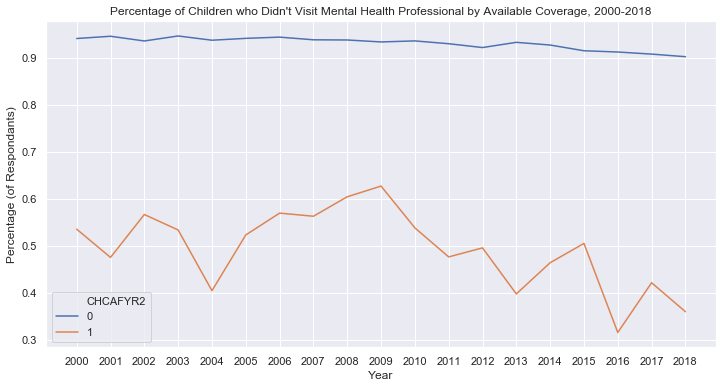

In [70]:
big_child_afford_mental_but_no = big_child_afford_mental.replace({"CHCSYR1": {1:0, 0:1}})

plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.lineplot(x="SRVY_YR", y="CHCSYR1", hue="CHCAFYR2", hue_order = [0,1], data=big_child_afford_mental_but_no, ci=None)
plt.title("Percentage of Children who Didn't Visit Mental Health Professional by Available Coverage, 2000-2018")
plt.xlabel("Year")
plt.xticks(child_summary["SRVY_YR"])
plt.ylabel("Percentage (of Respondants)");